# Your Details

Your Name: Divya Acharya

Your ID Number: 23283742

# Etivity 2 - Task 2: Hyperparameter Tuning - More DNN Optimization Methods

Until now, you've always used Gradient Descent to update the parameters and minimize the cost. In this notebook exercise activity, you'll gain skills with some more advanced optimization methods that can speed up learning and perhaps even get you to a better final value for the cost function. Having a good optimization algorithm can be the difference between waiting days vs. just a few hours to get a good result. 

By the end of this notebook, you'll be able to: 

* Apply optimization methods such as (Stochastic) Gradient Descent, Momentum, RMSProp and Adam
* Use random minibatches to accelerate convergence and improve optimization

Gradient descent goes "downhill" on a cost function $J$. Think of it as trying to do this: 
<img src="images/cost.jpg" style="width:650px;height:300px;">
<caption><center> <u> <b>Figure 1</b> </u>: <b>Minimizing the cost is like finding the lowest point in a hilly landscape</b><br> At each step of the training, you update your parameters following a certain direction to try to get to the lowest possible point. </center></caption>

**Notations**: As usual, $\frac{\partial J}{\partial a } = $ `da` for any variable `a`.


**For this assignment you will be need to complete the following exercises:**

- Section 2: [Exercise 1](#ex-1): Implement the gradient descent update rule.
- Section 3: [Exercise 2](#ex-2): Implement random minibatch 
- Section 4: [Exercise 3](#ex-3), [Exercise 4](#ex-4): Implement gradient descent with Momentum optimization
- Section 5: [Exercise 5](#ex-5), [Exercise 6](#ex-6): Implement gradient descent with Adam optimization
- Section 6: Analyze mini-batch gradient descent + mini-batch gradient descent with Momentum and with Adam   
- Section 7: [Exercise 7](#ex-7), [Exercise 8](#ex-8): Implement learning rate decay and fixed interval learning rate decay. Analyze learning rate decay with gradient descent including Momentum and Adam   

Let's get started!

## Important Note on Submission

There are 8 short exercises to complete in this task. Use notes provided to help you build understanding. Insert your code entries for each of these exercises. Please make sure to enter your code after this line, so that grading can easily be assessed.

**\# ENTER CODE HERE**

Please make sure you are not doing the following:

1. You have not added any _extra_ `print` statement(s) in the assignment.
2. You have not added any _extra_ code cell(s) in the assignment.
3. You have not changed any of the function parameters.
4. You are not using any global variables inside your graded exercises. Unless specifically instructed to do so, please refrain from it and use the local variables instead.
5. You are not changing the assignment code where it is not required, like creating _extra_ variables.

## Table of Contents
- [1- Packages and Dataset](#1)
    - [1.1 - Load Dataset](#1-1)
- [2 - Gradient Descent](#2)
    - [Exercise 1 - update_parameters_with_gd](#ex-1)
- [3 - Mini-Batch Gradient Descent](#3)
    - [Exercise 2 - random_mini_batches](#ex-2)
- [4 - Momentum](#4)
    - [Exercise 3 - initialize_velocity](#ex-3)
    - [Exercise 4 - update_parameters_with_momentum](#ex-4)
- [5 - Adam](#5)
    - [Exercise 5 - initialize_adam](#ex-5)
    - [Exercise 6 - update_parameters_with_adam](#ex-6)
- [6 - Model with different Optimization algorithms](#6)
    - [6.1 - Mini-Batch Gradient Descent](#6-1)
    - [6.2 - Mini-Batch Gradient Descent with Momentum](#6-2)
    - [6.3 - Mini-Batch with Adam](#6-3)
    - [6.4 - Summary Analysis](#6-4)
- [7 - Learning Rate Decay and Scheduling](#7)
    - [7.1 - Decay on every iteration](#7-1)
        - [Exercise 7 - update_lr](#ex-7)
    - [7.2 - Fixed Interval Scheduling](#7-2)
        - [Exercise 8 - schedule_lr_decay](#ex-8)
    - [7.3 - Using Learning Rate Decay for each Optimization Method](#7-3)
        - [7.3.1 - Gradient Descent with Learning Rate Decay](#7-3-1)
        - [7.3.2 - Gradient Descent with Momentum and Learning Rate Decay](#7-3-2)
        - [7.3.3 - Adam with Learning Rate Decay](#7-3-3)
    - [7.4 - Summary Analysis](#7-4)

<a name='1'></a>
## 1- Packages and Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
import sklearn.datasets
import pandas as pd
import math
import os

os.chdir ("dist")
from dnn_functions_v2 import *
from public_tests import *
os.chdir ("..")


%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

<a name='1-1'></a>  
### 1.1 - Load Dataset

**For this exercise, let's load the same datset that you used in Activity 2 - Part 1**  for the Cat vs. Dog classification exercise. Recall that we only have 1250 images in total, with a 75%:25% split between train and test data. The load_dataset() prepocesses the image data ready for input to the model.

In [2]:
train_x, train_y, test_x, test_y, classes = load_dataset()

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))
print ("train_y's shape: " + str(train_y.shape))
print ("test_y's shape: " + str(test_y.shape))

train_x's shape: (12288, 937)
test_x's shape: (12288, 313)
train_y's shape: (1, 937)
test_y's shape: (1, 313)


<a name='2'></a>
## 2 - Gradient Descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent. 

<a name='ex-1'></a>
### Exercise 1 - update_parameters_with_gd

Implement the gradient descent update rule. The  gradient descent rule is, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary. Note that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$. 

In [3]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 2 lines of code)
        parameters["W" + str(l)] -= learning_rate * grads["dW" + str(l)]  
        parameters["b" + str(l)] -= learning_rate * grads["db" + str(l)]

    return parameters

In [4]:
update_parameters_with_gd_test(update_parameters_with_gd)

All test passed


A variant of this is Stochastic Gradient Descent (SGD), which is equivalent to mini-batch gradient descent, where each mini-batch has just 1 example. The update rule that you have just implemented does not change. What changes is that you would be computing gradients on just one training example at a time, rather than on the whole training set. The code examples below illustrate the difference between stochastic gradient descent and (batch) gradient descent. 

- **(Batch) Gradient Descent**:

``` python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    # Forward propagation
    a, caches = forward_propagation(X, parameters)
    # Compute cost
    cost_total = compute_cost(a, Y)  # Cost for m training examples
    # Backward propagation
    grads = backward_propagation(a, caches, parameters)
    # Update parameters
    parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
        
```

- **Stochastic Gradient Descent**:

```python
X = data_input
Y = labels
m = X.shape[1]  # Number of training examples
parameters = initialize_parameters(layers_dims)
for i in range(0, num_iterations):
    cost_total = 0
    for j in range(0, m):
        # Forward propagation
        a, caches = forward_propagation(X[:,j], parameters)
        # Compute cost
        cost_total += compute_cost(a, Y[:,j])  # Cost for one training example
        # Backward propagation
        grads = backward_propagation(a, caches, parameters)
        # Update parameters
        parameters = update_parameters(parameters, grads)
    # Compute average cost
    cost_avg = cost_total / m
```


In Stochastic Gradient Descent, you use only 1 training example before updating the gradients. When the training set is large, SGD can be faster. But the parameters will "oscillate" toward the minimum rather than converge smoothly. Here's what they looks like: 

<img src="images/kiank_sgd.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 1</b> </u><font color='purple'>  : <b>SGD vs GD</b><br> "+" denotes a minimum of the cost. SGD leads to many oscillations to reach convergence, but each step is a lot faster to compute for SGD than it is for GD, as it uses only one training example (vs. the whole batch for GD). </center></caption>

**Note** also that implementing SGD requires 3 for-loops in total:
1. Over the number of iterations
2. Over the $m$ training examples
3. Over the layers (to update all parameters, from $(W^{[1]},b^{[1]})$ to $(W^{[L]},b^{[L]})$)

In practice, you'll often get faster results if you don't use the entire training set, or just one training example, to perform each update. Mini-batch gradient descent uses an intermediate number of examples for each step. With mini-batch gradient descent, you loop over the mini-batches instead of looping over individual training examples.

<img src="images/kiank_minibatch.png" style="width:750px;height:250px;">
<caption><center> <u> <font color='purple'> <b>Figure 2</b> </u>: <font color='purple'>  <b>SGD vs Mini-Batch GD</b><br> "+" denotes a minimum of the cost. Using mini-batches in your optimization algorithm often leads to faster optimization. </center></caption>

<a name='3'></a>
## 3 - Mini-Batch Gradient Descent

Now you'll build some mini-batches from the training set (X, Y).

There are two steps:
- **Shuffle**: Create a shuffled version of the training set (X, Y) as shown below. Each column of X and Y represents a training example. Note that the random shuffling is done synchronously between X and Y. Such that after the shuffling the $i^{th}$ column of X is the example corresponding to the $i^{th}$ label in Y. The shuffling step ensures that examples will be split randomly into different mini-batches. 

<img src="images/kiank_shuffle.png" style="width:550px;height:300px;">

- **Partition**: Partition the shuffled (X, Y) into mini-batches of size `mini_batch_size` (here 64). Note that the number of training examples is not always divisible by `mini_batch_size`. The last mini batch might be smaller, but you don't need to worry about this. When the final mini-batch is smaller than the full `mini_batch_size`, it will look like this: 

<img src="images/kiank_partition.png" style="width:550px;height:300px;">

<a name='ex-2'></a>
### Exercise 2 - random_mini_batches

Implement `random_mini_batches`. The shuffling part has already been coded for you! To help with the partitioning step, you've been provided the following code that selects the indexes for the $1^{st}$ and $2^{nd}$ mini-batches:
```python
first_mini_batch_X = shuffled_X[:, 0 : mini_batch_size]
second_mini_batch_X = shuffled_X[:, mini_batch_size : 2 * mini_batch_size]
...
```

Note that the last mini-batch might end up smaller than `mini_batch_size=64`. Let $\lfloor s \rfloor$ represents $s$ rounded down to the nearest integer (this is `math.floor(s)` in Python). If the total number of examples is not a multiple of `mini_batch_size=64` then there will be $\left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor$ mini-batches with a full 64 examples, and the number of examples in the final mini-batch will be $\left(m-mini_\_batch_\_size \times \left\lfloor \frac{m}{mini\_batch\_size}\right\rfloor\right)$. 

**Hint:**

$$mini\_batch\_X = shuffled\_X[:, i : j]$$ 

Think of a way in which you can use the for loop variable `k` to help you increment `i` and `j` in multiples of mini_batch_size.

As an example, if you want to increment in multiples of 3, you could the following:

```python
n = 3
for k in (0 , 5):
    print(k * n)
```

In [12]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as the TAs
    m = X.shape[1]                  # number of training examples
    mini_batches = []
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((1, m))
    
    inc = mini_batch_size

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning

    for k in range(0, num_complete_minibatches):
        # ENTER CODE HERE (~2 lines of code)
        mini_batch_X = shuffled_X[:, k * mini_batch_size : (k + 1) * mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : (k + 1) * mini_batch_size]

        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        # ENTER CODE HERE (~2 lines of code)
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : ]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : ]
   
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [13]:
random_mini_batches_test(random_mini_batches)

 All tests passed.


In [14]:
np.random.seed(1)
mini_batch_size = 64
mini_batches = random_mini_batches(train_x, train_y, mini_batch_size)
n_batches = len(mini_batches)

print ("Shape of the 1st mini_batch_X: " + str(mini_batches[0][0].shape))
print ("Shape of the 2nd mini_batch_X: " + str(mini_batches[1][0].shape))
print ("Shape of the " + str(n_batches-1) + "th mini_batch_X: " + str(mini_batches[n_batches-2][0].shape))
print ("Shape of the " + str(n_batches) + "th mini_batch_X: " + str(mini_batches[n_batches-1][0].shape))
print ("Shape of the 1st mini_batch_Y: " + str(mini_batches[0][1].shape))
print ("Shape of the 2nd mini_batch_Y: " + str(mini_batches[1][1].shape)) 
print ("Shape of the " + str(n_batches-1) + "th mini_batch_Y: " + str(mini_batches[n_batches-2][1].shape))
print ("Shape of the " + str(n_batches) + "th mini_batch_Y: " + str(mini_batches[n_batches-1][1].shape))

Shape of the 1st mini_batch_X: (12288, 64)
Shape of the 2nd mini_batch_X: (12288, 64)
Shape of the 14th mini_batch_X: (12288, 64)
Shape of the 15th mini_batch_X: (12288, 41)
Shape of the 1st mini_batch_Y: (1, 64)
Shape of the 2nd mini_batch_Y: (1, 64)
Shape of the 14th mini_batch_Y: (1, 64)
Shape of the 15th mini_batch_Y: (1, 41)


<font color='blue'>
    
**What you should remember**:
- Shuffling and Partitioning are the two steps required to build mini-batches
- Powers of two are often chosen to be the mini-batch size, e.g., 16, 32, 64, 128.
    

<a name='4'></a>
## 4 - Momentum

Because mini-batch gradient descent makes a parameter update after seeing just a subset of examples, the direction of the update has some variance, and so the path taken by mini-batch gradient descent will "oscillate" toward convergence. Using momentum can reduce these oscillations. 

Momentum takes into account the past gradients to smooth out the update. The 'direction' of the previous gradients is stored in the variable $v$. Formally, this will be the exponentially weighted average of the gradient on previous steps. You can also think of $v$ as the "velocity" of a ball rolling downhill, building up speed (and momentum) according to the direction of the gradient/slope of the hill. 

<img src="images/opt_momentum.png" style="width:400px;height:250px;">
<caption><center> <u><font color='purple'><b>Figure 3</b> </u><font color='purple'>: The red arrows show the direction taken by one step of mini-batch gradient descent with momentum. The blue points show the direction of the gradient (with respect to the current mini-batch) on each step. Rather than just following the gradient, the gradient is allowed to influence $v$ and then take a step in the direction of $v$.<br> <font color='black'> </center>


<a name='ex-3'></a>    
### Exercise 3 - initialize_velocity
Initialize the velocity. The velocity, $v$, is a python dictionary that needs to be initialized with arrays of zeros. Its keys are the same as those in the `grads` dictionary, that is:
for $l =1,...,L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
```
**Note** that the iterator l starts at 1 in the for loop as the first parameters are v["dW1"] and v["db1"] (that's a "one" on the superscript).

In [8]:
# GRADED FUNCTION: initialize_velocity

def initialize_velocity(parameters):
    """
    Initializes the velocity as a python dictionary with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    
    Returns:
    v -- python dictionary containing the current velocity.
                    v['dW' + str(l)] = velocity of dWl
                    v['db' + str(l)] = velocity of dbl
    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    
    # Initialize velocity
    for l in range(1, L + 1):
        # ENTER CODE  HERE (~2 lines of code)
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        
    return v

In [9]:
initialize_velocity_test(initialize_velocity)

 All tests passed.


<a name='ex-4'></a>   
### Exercise 4 - update_parameters_with_momentum

Now, implement the parameters update with momentum. The momentum update rule is, for $l = 1, ..., L$: 

$$ \begin{cases}
v_{dW^{[l]}} = \beta v_{dW^{[l]}} + (1 - \beta) dW^{[l]} \\
W^{[l]} = W^{[l]} - \alpha v_{dW^{[l]}}
\end{cases}\tag{3}$$

$$\begin{cases}
v_{db^{[l]}} = \beta v_{db^{[l]}} + (1 - \beta) db^{[l]} \\
b^{[l]} = b^{[l]} - \alpha v_{db^{[l]}} 
\end{cases}\tag{4}$$

where L is the number of layers, $\beta$ is the momentum and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary.  Note that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$ (that's a "one" on the superscript).

In [15]:
# GRADED FUNCTION: update_parameters_with_momentum

def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):
    """
    Update parameters using Momentum
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- python dictionary containing the current velocity:
                    v['dW' + str(l)] = ...
                    v['db' + str(l)] = ...
    beta -- the momentum hyperparameter, scalar
    learning_rate -- the learning rate, scalar
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- python dictionary containing your updated velocities
    """

    L = len(parameters) // 2 # number of layers in the neural networks
    
    # Momentum update for each parameter
    for l in range(1, L + 1):
        # ENTER CODE HERE (~ 4 lines)
        # compute velocities
        v["dW" + str(l)] = beta * v["dW" + str(l)] + (1 - beta) * grads['dW' + str(l)]
        v["db" + str(l)] = beta * v["db" + str(l)] + (1 - beta) * grads['db' + str(l)]
        # update parameters
        parameters["W" + str(l)] -= learning_rate * v["dW" + str(l)]
        parameters["b" + str(l)] -= learning_rate * v["db" + str(l)]

        
    return parameters, v

In [16]:
update_parameters_with_momentum_test(update_parameters_with_momentum)

 All tests passed.


**Note that**:
- The velocity is initialized with zeros. So the algorithm will take a few iterations to "build up" velocity and start to take bigger steps.
- If $\beta = 0$, then this just becomes standard gradient descent without momentum. 

**How do you choose $\beta$?**

- The larger the momentum $\beta$ is, the smoother the update, because it takes the past gradients into account more. But if $\beta$ is too big, it could also smooth out the updates too much. 
- Common values for $\beta$ range from 0.8 to 0.999. If you don't feel inclined to tune this, $\beta = 0.9$ is often a reasonable default. 
- Tuning the optimal $\beta$ for your model might require trying several values to see what works best in terms of reducing the value of the cost function $J$. 

<font color='blue'>
    
**What you should remember**:
- Momentum takes past gradients into account to smooth out the steps of gradient descent. It can be applied with batch gradient descent, mini-batch gradient descent or stochastic gradient descent.
- You have to tune a momentum hyperparameter $\beta$ and a learning rate $\alpha$.

<a name='5'></a>   
## 5 - Adam

Adam is one of the most effective optimization algorithms for training neural networks. It combines ideas from RMSProp (described in Primary Resources) and Momentum. 

**How does Adam work?**
1. It calculates an exponentially weighted average of past gradients, and stores it in variables $v$ (before bias correction) and $v^{corrected}$ (with bias correction). 
2. It calculates an exponentially weighted average of the squares of the past gradients, and  stores it in variables $s$ (before bias correction) and $s^{corrected}$ (with bias correction). 
3. It updates parameters in a direction based on combining information from "1" and "2".

The update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$
where:
- t counts the number of steps taken of Adam 
- L is the number of layers
- $\beta_1$ and $\beta_2$ are hyperparameters that control the two exponentially weighted averages. 
- $\alpha$ is the learning rate
- $\varepsilon$ is a very small number to avoid dividing by zero

As usual, all parameters are stored in the `parameters` dictionary  

<a name='ex-5'></a>   
### Exercise 5 - initialize_adam

Initialize the Adam variables $v, s$ which keep track of the past information.

**Instruction**: The variables $v, s$ are python dictionaries that need to be initialized with arrays of zeros. Their keys are the same as for `grads`, that is:
for $l = 1, ..., L$:
```python
v["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
v["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])
s["dW" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["W" + str(l)])
s["db" + str(l)] = ... #(numpy array of zeros with the same shape as parameters["b" + str(l)])

```

In [17]:
# GRADED FUNCTION: initialize_adam

def initialize_adam(parameters) :
    """
    Initializes v and s as two python dictionaries with:
                - keys: "dW1", "db1", ..., "dWL", "dbL" 
                - values: numpy arrays of zeros of the same shape as the corresponding gradients/parameters.
    
    Arguments:
    parameters -- python dictionary containing your parameters.
                    parameters["W" + str(l)] = Wl
                    parameters["b" + str(l)] = bl
    
    Returns: 
    v -- python dictionary that will contain the exponentially weighted average of the gradient. Initialized with zeros.
                    v["dW" + str(l)] = ...
                    v["db" + str(l)] = ...
    s -- python dictionary that will contain the exponentially weighted average of the squared gradient. Initialized with zeros.
                    s["dW" + str(l)] = ...
                    s["db" + str(l)] = ...

    """
    
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(1, L + 1):
        v["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        v["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
        s["dW" + str(l)] = np.zeros_like(parameters["W" + str(l)])
        s["db" + str(l)] = np.zeros_like(parameters["b" + str(l)])
            
    
    return v, s

In [18]:
initialize_adam_test(initialize_adam)

 All tests passed.


<a name='ex-6'></a>   
### Exercise 6 - update_parameters_with_adam

Now, implement the parameters update with Adam. Recall the general update rule is, for $l = 1, ..., L$: 

$$\begin{cases}
v_{dW^{[l]}} = \beta_1 v_{dW^{[l]}} + (1 - \beta_1) \frac{\partial \mathcal{J} }{ \partial W^{[l]} } \\
v^{corrected}_{dW^{[l]}} = \frac{v_{dW^{[l]}}}{1 - (\beta_1)^t} \\
s_{dW^{[l]}} = \beta_2 s_{dW^{[l]}} + (1 - \beta_2) (\frac{\partial \mathcal{J} }{\partial W^{[l]} })^2 \\
s^{corrected}_{dW^{[l]}} = \frac{s_{dW^{[l]}}}{1 - (\beta_2)^t} \\
W^{[l]} = W^{[l]} - \alpha \frac{v^{corrected}_{dW^{[l]}}}{\sqrt{s^{corrected}_{dW^{[l]}}} + \varepsilon}
\end{cases}$$


**Note** that the iterator `l` starts at 1 in the `for` loop as the first parameters are $W^{[1]}$ and $b^{[1]}$. 

In [19]:
# GRADED FUNCTION: update_parameters_with_adam

def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    """
    Update parameters using Adam
    
    Arguments:
    parameters -- python dictionary containing your parameters:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients for each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    t -- Adam variable, counts the number of taken steps
    learning_rate -- the learning rate, scalar.
    beta1 -- Exponential decay hyperparameter for the first moment estimates 
    beta2 -- Exponential decay hyperparameter for the second moment estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates

    Returns:
    parameters -- python dictionary containing your updated parameters 
    v -- Adam variable, moving average of the first gradient, python dictionary
    s -- Adam variable, moving average of the squared gradient, python dictionary
    """
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(1, L + 1):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        # ENTER CODE HERE (~2 lines)
        v["dW" + str(l)] = beta1 * v["dW" + str(l)] + (1 - beta1) * grads['dW' + str(l)]
        v["db" + str(l)] = beta1 * v["db" + str(l)] + (1 - beta1) * grads['db' + str(l)]


        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        # ENTER CODE HERE (~2 lines)
        v_corrected["dW" + str(l)] = v["dW" + str(l)] / (1 - beta1 ** t)
        v_corrected["db" + str(l)] = v["db" + str(l)] / (1 - beta1 ** t)

        
        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        # ENTER CODE HERE (~2 lines)
        s["dW" + str(l)] = beta2 * s["dW" + str(l)] + (1 - beta2) * (grads['dW' + str(l)] ** 2)
        s["db" + str(l)] = beta2 * s["db" + str(l)] + (1 - beta2) * (grads['db' + str(l)] ** 2)


        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        # ENTER CODE HERE (~2 lines)
        s_corrected["dW" + str(l)] = s["dW" + str(l)] / (1 - beta2 ** t)
        s_corrected["db" + str(l)] = s["db" + str(l)] / (1 - beta2 ** t)


        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        # ENTER CODE HERE (~2 lines)
        parameters["W" + str(l)] -= learning_rate * v_corrected["dW" + str(l)] / (np.sqrt(s_corrected["dW" + str(l)]) + epsilon)
        parameters["b" + str(l)] -= learning_rate * v_corrected["db" + str(l)] / (np.sqrt(s_corrected["db" + str(l)]) + epsilon)


    return parameters, v, s, v_corrected, s_corrected

In [20]:
update_parameters_with_adam_test(update_parameters_with_adam)

All test passed


You now have three working optimization algorithms (mini-batch gradient descent, Momentum, Adam). Let's implement a model with each of these optimizers and observe the difference.

<a name='6'></a>  
## 6 - Model with different Optimization algorithms

A L-layer neural network model has already been implemented for you! You'll train it with: 
- Mini-batch **Gradient Descent**: it will call your function:
    - `update_parameters_with_gd()`
- Mini-batch **Momentum**: it will call your functions:
    - `initialize_velocity()` and `update_parameters_with_momentum()`
- Mini-batch **Adam**: it will call your functions:
    - `initialize_adam()` and `update_parameters_with_adam()`

In [21]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 2500, print_cost = True):
    """
    L-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    optimizer -- the optimizer to be passed, gradient descent, momentum or adam
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
            AL, caches = L_model_forward(minibatch_X, parameters)        

            # Compute cost and add to the cost total
            cost_total += compute_cost(AL, minibatch_Y)

            # Backward propagation
            grads = L_model_backward(AL, minibatch_Y, caches)
            
            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 100 epoch
        if print_cost and i % 100 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

Now, run this L layer neural network with each of the 3 optimization methods.

<a name='6-1'></a>  
### 6.1 - Mini-Batch Gradient Descent

Run the following code to see how the model does with mini-batch gradient descent.

Cost after epoch 0: 0.692981
Cost after epoch 100: 0.666447
Cost after epoch 200: 0.626007
Cost after epoch 300: 0.568560
Cost after epoch 400: 0.482246


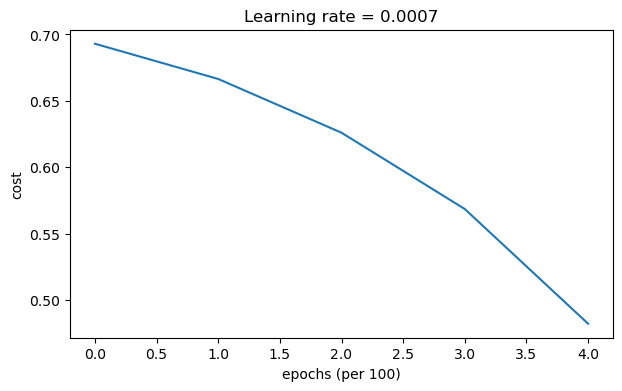

On the training set:
Accuracy: 0.8740661686232658


In [23]:
# Train 5-layer model
layers_dims = [train_x.shape[0], 80, 33, 12, 5, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "gd", num_epochs = 500)

print ("On the training set:")
predictions = predict(train_x, train_y, parameters)

<a name='6-2'></a>  
### 6.2 - Mini-Batch Gradient Descent with Momentum

Next, run the following code to see how the model does with momentum. Because this example is relatively simple, the gains from using momemtum are small - but for more complex problems you might see bigger gains.

Cost after epoch 0: 0.693141
Cost after epoch 100: 0.674171
Cost after epoch 200: 0.636831
Cost after epoch 300: 0.583992
Cost after epoch 400: 0.503707


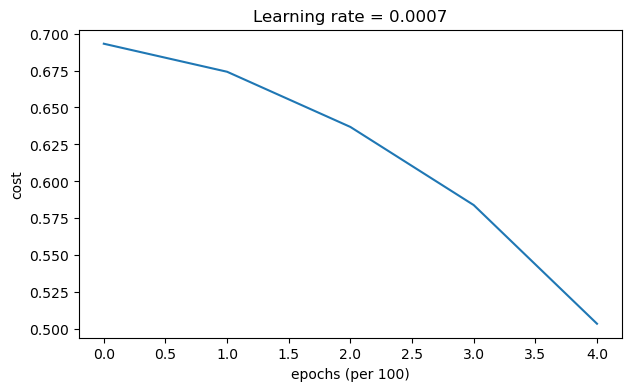

On the training set:
Accuracy: 0.9028815368196371


In [24]:
# Train 5-layer model
layers_dims = [train_x.shape[0], 80, 33, 12, 5, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "momentum", beta = 0.9, num_epochs = 500)

# Predictions
print ("On the training set:")
predictions = predict(train_x, train_y, parameters)

<a name='6-3'></a>  
### 6.3 - Mini-Batch with Adam

Finally, run the following code to see how the model does with Adam. I had to slow down the learning rate as there was an error in the cost calculations dividing by zero (No exception handling in this code)

Cost after epoch 0: 0.693508
Cost after epoch 100: 0.107194
Cost after epoch 200: 0.001111
Cost after epoch 300: 0.000262
Cost after epoch 400: 0.000087


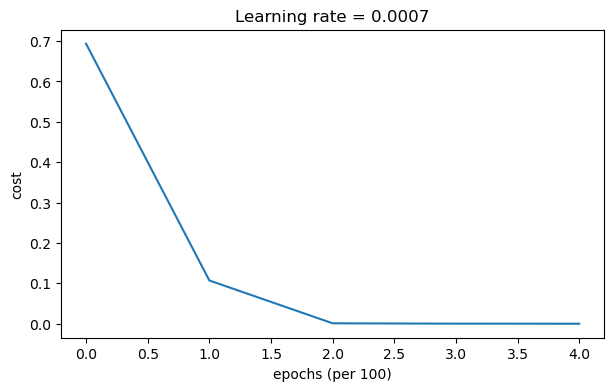

Accuracy: 0.9999999999999999


In [25]:
# Train 5-layer model
layers_dims = [train_x.shape[0], 80, 33, 12, 5, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "adam", num_epochs = 500)

# Predictions
predictions = predict(train_x, train_y, parameters)

**References**:

- Adam paper: https://arxiv.org/pdf/1412.6980.pdf

<a name='6-4'></a>  
### 6.4 - Summary Analysis

Comment on the results and any differences between the various Gradient Descent optimization methods you have used for the cat vs. dog  model training. Which optimization algorithm performs the best and are these results what you would have expected? Can you make any specific observations about these 3 methods.

### <span style='color: red;'>Insert your comments in this markdown cell here.</span> ###

#### Gradient Descent (GD):

The cost gradually declines over epochs, indicating decrease in training error.

So the accuracy on the training set is 0.8741 meaning that the model has been performing quite well.

Nonetheless, it seems to be slower to converge compared with other optimization algorithms.



#### Gradient Descent with Momentum (GD with Momentum):

The rate of decrease in cost is higher than for vanilla Gradient Descent which means faster convergence.

In addition, accuracy on training set is improved compared to vanilla Gradient Descent obtaining 0.9029.



#### Adam:

For each epoch the cost reduces dramatically therefore showing a very fast convergence.

On top of that, when considering the accuracy on the training set, it is almost perfect equaling 0.9999 meaning that there was excellent performance.

Generally, these outcomes put into perspective how significant it can be to select an efficient optimization technique since it may significantly determine how quickly a model learns and its overall performance. In this case, Adam stands out as the preferred choice due to its rapid convergence and high accuracy.

##  Let's load a new dataset for the final section 7
We will use the following "moons" dataset to test the different optimization methods in this section as the Cat vs. Dog classification for training takes a long time without a GPU. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

In [26]:
def load_moon_dataset():
    np.random.seed(5)
    train_x, train_y = sklearn.datasets.make_moons(n_samples=1000, noise=.2) #1000 #0.2
    # Visualize the data
    plt.scatter(train_x[:, 0], train_x[:, 1], c=train_y, s=40, cmap=plt.cm.Spectral);
    train_x = train_x.T
    train_y = train_y.reshape((1, train_y.shape[0]))
    
    return train_x, train_y

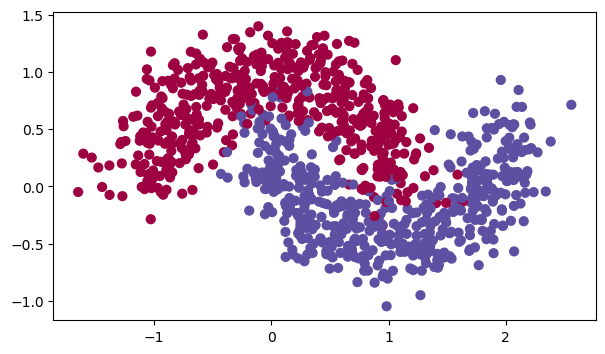

In [27]:
train_x, train_y = load_moon_dataset()

<a name='7'></a>  
## 7 - Learning Rate Decay and Scheduling

Finally, the learning rate is another hyperparameter that can help you speed up learning. 

During the first part of training, your model can get away with taking large steps, but over time, using a fixed value for the learning rate alpha can cause your model to get stuck in a wide oscillation that never quite converges. But if you were to slowly reduce your learning rate alpha over time, you could then take smaller, slower steps that bring you closer to the minimum. This is the idea behind learning rate decay. 

Learning rate decay can be achieved by using either adaptive methods or pre-defined learning rate schedules. 

Now, you'll apply scheduled learning rate decay to a 3-layer neural network in three different optimizer modes and see how each one differs, as well as the effect of scheduling at different epochs. 

This model is essentially the same as the one you used before, except in this one you'll be able to include learning rate decay. It includes two new parameters, decay and decay_rate. 

In [28]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 2500, print_cost = True, decay=None, decay_rate=1):
    """
    L-layer neural network model which can be run in different optimizer modes.
    
    Arguments:
    X -- input data, of shape (2, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    layers_dims -- python list, containing the size of each layer
    learning_rate -- the learning rate, scalar.
    mini_batch_size -- the size of a mini batch
    beta -- Momentum hyperparameter
    beta1 -- Exponential decay hyperparameter for the past gradients estimates 
    beta2 -- Exponential decay hyperparameter for the past squared gradients estimates 
    epsilon -- hyperparameter preventing division by zero in Adam updates
    num_epochs -- number of epochs
    print_cost -- True to print the cost every 1000 epochs

    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    lr_rates = []
    learning_rate0 = learning_rate   # the original learning rate
    
    # Initialize parameters
    parameters = initialize_parameters(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            AL, caches =  L_model_forward(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_cost(AL, minibatch_Y)

            # Backward propagation
            grads =  L_model_backward(AL, minibatch_Y, caches)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s, _, _ = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        if decay:
            learning_rate = decay(learning_rate0, i, decay_rate)
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
            if decay:
                print("learning rate after epoch %i: %f"%(i, learning_rate))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 1000)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

<a name='7-1'></a>  
### 7.1 - Decay on every iteration  

For this portion of the assignment, you'll try one of the pre-defined schedules for learning rate decay, called exponential learning rate decay. It takes this mathematical form:

$$\alpha = \frac{1}{1 + decayRate \times epochNumber} \alpha_{0}$$

<a name='ex-7'></a>  
### Exercise 7 - update_lr

Calculate the new learning rate using exponential weight decay.

In [29]:
# GRADED FUNCTION: update_lr

def update_lr(learning_rate0, epoch_num, decay_rate):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer
    decay_rate -- Decay rate. Scalar

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    # ENTER CODE  HERE (~1 line)
    learning_rate = learning_rate0 / (1 + decay_rate * epoch_num)
       
    return learning_rate

In [30]:
update_lr_test(update_lr)

All test passed


Cost after epoch 0: 0.694541
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.603515
learning rate after epoch 1000: 0.000100
Cost after epoch 2000: 0.589597
learning rate after epoch 2000: 0.000050
Cost after epoch 3000: 0.581345
learning rate after epoch 3000: 0.000033
Cost after epoch 4000: 0.575444
learning rate after epoch 4000: 0.000025


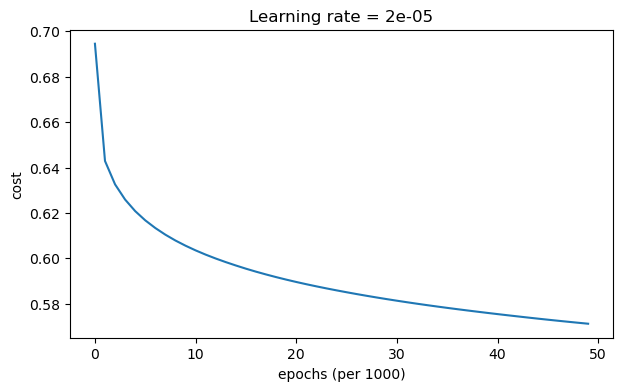

Accuracy: 0.7060000000000002


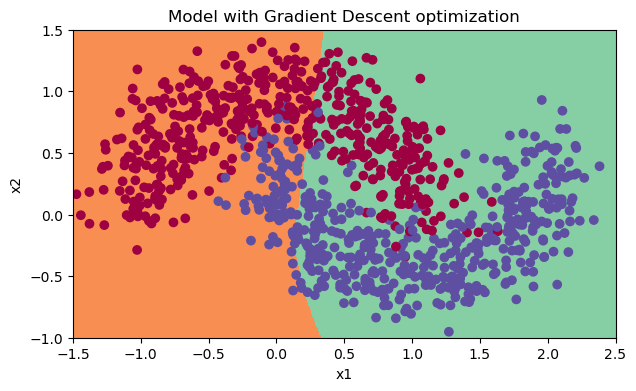

In [31]:
# Train 3-layer model
layers_dims = [train_x.shape[0], 5, 2, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=update_lr)

# Predictions
predictions = predict(train_x, train_y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

Notice that if you set the decay to occur at every iteration, the learning rate goes to zero too quickly - even if you start with a higher learning rate. 
<table> 
    <tr>
        <td>
        <b>Epoch Number</b>
        </td>
        <td>
        <b>Learning Rate</b>
        </td>
        <td>
        <b>Cost</b>
        </td>
    </tr>
    <tr>
        <td>
        0
        </td>
        <td>
        0.100000
        </td>
        <td>
        0.694541
        </td>
    </tr>
    <tr>
        <td>
        1000
        </td>
        <td>
        0.000100
        </td>
        <td>
        0.603515
        </td>
    </tr>
    <tr>
        <td>
        2000
        </td>
        <td>
        0.000050
        </td>
        <td>
        0.589597
        </td>
    </tr>
    <tr>
        <td>
        3000
        </td>
        <td>
        0.000033
        </td>
        <td>
        0.581345
        </td>
    </tr>
    <tr>
        <td>
        4000
        </td>
        <td>
        0.000025
        </td>
        <td>
       0.575444
        </td>
    </tr>
</table> 

When you're training for a few epochs this doesn't cause a lot of trouble, but when the number of epochs is large the optimization algorithm will stop updating. One common fix to this issue is to decay the learning rate every few steps. This is called fixed interval scheduling.

<a name='7-2'></a> 
### 7.2 - Fixed Interval Scheduling

You can help prevent the learning rate speeding to zero too quickly by scheduling the exponential learning rate decay at a fixed time interval, for example 1000. You can either number the intervals, or divide the epoch by the time interval, which is the size of window with the constant learning rate. 

<img src="images/lr.png" style="width:400px;height:250px;">

<a name='ex-8'></a> 
### Exercise 8 - schedule_lr_decay

Calculate the new learning rate using exponential weight decay with fixed interval scheduling.

**Instructions**: Implement the learning rate scheduling such that it only changes when the epochNum is a multiple of the timeInterval.

**Note:** The fraction in the denominator uses the floor operation. 

$$\alpha = \frac{1}{1 + decayRate \times \lfloor\frac{epochNum}{timeInterval}\rfloor} \alpha_{0}$$

**Hint:** [numpy.floor](https://numpy.org/doc/stable/reference/generated/numpy.floor.html)

In [32]:
# GRADED FUNCTION: schedule_lr_decay

def schedule_lr_decay(learning_rate0, epoch_num, decay_rate, time_interval=1000):
    """
    Calculates updated the learning rate using exponential weight decay.
    
    Arguments:
    learning_rate0 -- Original learning rate. Scalar
    epoch_num -- Epoch number. Integer.
    decay_rate -- Decay rate. Scalar.
    time_interval -- Number of epochs where you update the learning rate.

    Returns:
    learning_rate -- Updated learning rate. Scalar 
    """
    # ENTER CODE  HERE (~1 line)
    if epoch_num % time_interval == 0:
        learning_rate = learning_rate0 / (1 + decay_rate * (epoch_num // time_interval))
    else:
        learning_rate = learning_rate0
    
    return learning_rate

In [33]:
schedule_lr_decay_test(schedule_lr_decay)

All test passed


<a name='7-3'></a> 
### 7.3 - Using Learning Rate Decay for each Optimization Method

Below, you'll use the following "moons" dataset to test the different optimization methods. (The dataset is named "moons" because the data from each of the two classes looks a bit like a crescent-shaped moon.) 

<a name='7-3-1'></a> 
#### 7.3.1 - Gradient Descent with Learning Rate Decay

Run the following code to see how the model does gradient descent and weight decay.

Cost after epoch 0: 0.694541
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.107484
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.105175
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.103508
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.103146
learning rate after epoch 4000: 0.020000


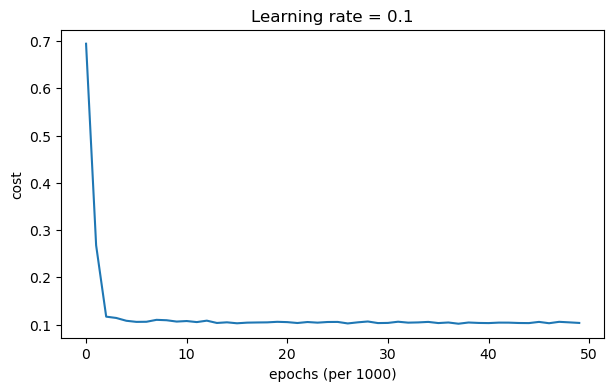

Accuracy: 0.9530000000000004


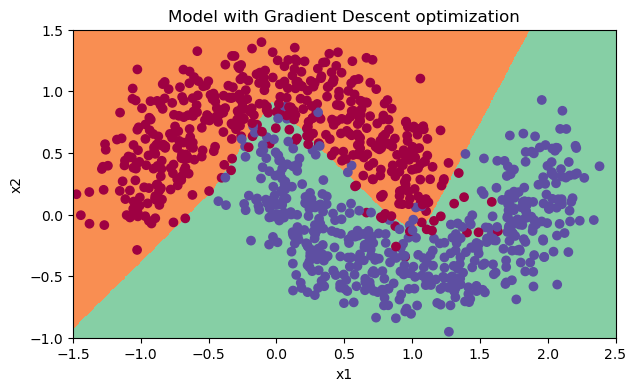

In [34]:
# Train 3-layer model
layers_dims = [train_x.shape[0], 5, 2, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "gd", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

predictions = predict(train_x, train_y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

<a name='7-3-2'></a> 
#### 7.3.2 - Gradient Descent with Momentum and Learning Rate Decay

Run the following code to see how the model does gradient descent with momentum and weight decay.

Cost after epoch 0: 0.696246
learning rate after epoch 0: 0.100000
Cost after epoch 1000: 0.103112
learning rate after epoch 1000: 0.050000
Cost after epoch 2000: 0.102907
learning rate after epoch 2000: 0.033333
Cost after epoch 3000: 0.102053
learning rate after epoch 3000: 0.025000
Cost after epoch 4000: 0.101754
learning rate after epoch 4000: 0.020000


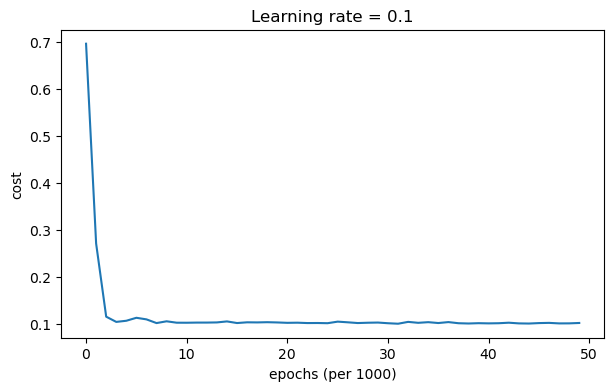

Accuracy: 0.9620000000000004


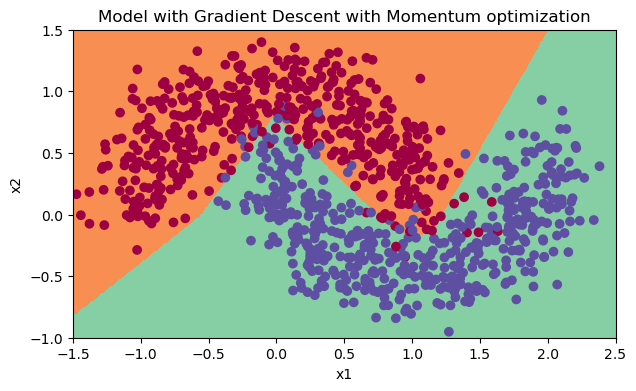

In [35]:
# Train 3-layer model
layers_dims = [train_x.shape[0], 5, 2, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "momentum", learning_rate = 0.1, num_epochs=5000, decay=schedule_lr_decay)

# Predictions
predictions = predict(train_x, train_y, parameters)

# Plot decision boundary
plt.title("Model with Gradient Descent with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

<a name='7-3-3'></a> 
#### 7.3.3 - Gradient Descent with Adam opitmization and Learning Rate Decay

Run the following code to see how the model does Adam and weight decay. The initial learning_rate parameter is set to a smaller value for Adam optimization.

Cost after epoch 0: 0.684264
learning rate after epoch 0: 0.010000
Cost after epoch 1000: 0.104383
learning rate after epoch 1000: 0.005000
Cost after epoch 2000: 0.102540
learning rate after epoch 2000: 0.003333
Cost after epoch 3000: 0.101574
learning rate after epoch 3000: 0.002500
Cost after epoch 4000: 0.088311
learning rate after epoch 4000: 0.002000


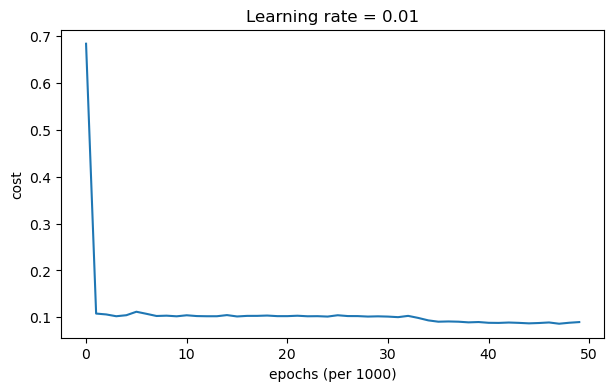

Accuracy: 0.9620000000000004


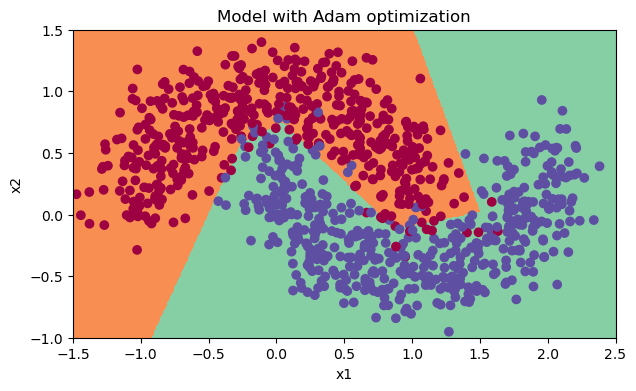

In [36]:
# Train 3-layer model
layers_dims = [train_x.shape[0], 5, 2, 1]
parameters = model(train_x, train_y, layers_dims, optimizer = "adam", learning_rate = 0.01, num_epochs=5000, decay=schedule_lr_decay)

# Predictions
predictions = predict(train_x, train_y, parameters)

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.5])
axes.set_ylim([-1,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_x, train_y)

<a name='7-4'></a> 
### 7.4 - Summary Analysis

**Note**: Comment on the results and any differences between the optimization methods that apply learning rate decay. Are these results what you would have expected and how do they compare to when learning rate decay is not applied? Are there any specific observations you can note of interest?

### <span style='color: red;'>Insert your comments in this markdown cell here.</span> ###

### Gradient Descent with Learning Rate Decay: 
As the cost progressively drops over epochs, training error is reduced. As the learning rate approaches zero, the optimization process benefits from the ability to fine-tune the model parameters as it gets closer to convergence. The ultimate accuracy is significantly higher than with normal Gradient Descent, proving that learning rate decay can effectively increase optimization performance.

### Gradient Descent with Momentum and Learning Rate Decay: 
This approach shows better accuracy and convergence with declining costs and a declining learning rate over epochs, much as Gradient Descent with learning rate decay. By adding momentum, convergence is accelerated even further, leading to marginally cheaper costs and improved accuracy as compared to standard Gradient Descent with learning rate decay.

### Gradient Descent with Learning Rate Decay and Adam Optimization: 
When paired with learning rate decay, Adam optimization exhibits excellent accuracy and fast convergence, much like its performance in the absence of learning rate decay. On the other hand, by progressively lowering the learning rate as the optimization advances, the inclusion of learning rate decay leads to more stable optimization. Smoother convergence curves and maybe improved generalization to unobserved data are the outcomes of this.

Overall, these findings are in line with predictions as learning rate decay improves convergence and accuracy by adjusting the optimization process and preventing overshooting. The comparison also shows how optimization methods and learning rate decay complement each other, with Adam optimization showing the most stable performance, particularly when combined with learning rate decay.



**Congratulations**! You've made it to the end of the Optimization methods notebook. Here's a quick recap of everything you're now able to do: 

* Apply three different optimization methods to your models 
* Build mini-batches for your training set 
* Use learning rate decay scheduling

**Nice work - well done!**